# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 17
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Screen_Time_Before_Bed'

## I.

In [2]:
col = 'Screen_Time_Before_Bed'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

In [4]:
data = df[cols[N % 7]]

In [5]:
mean = data.mean()                      
variance = data.var(ddof=1)             
mode = data.mode().iloc[0]              
median = data.median()                  
quantiles = data.quantile([0.25, 0.5, 0.75])  
excess_kurtosis = stats.kurtosis(data)  
skewness = stats.skew(data)             
iqr = stats.iqr(data)                   

print("Среднее:", mean)
print("Дисперсия:", variance)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили:\n", quantiles)
print("Эксцесс:", excess_kurtosis)
print("Асимметрия:", skewness)
print("Интерквартильный размах:", iqr)

Среднее: 1.0067333333333335
Дисперсия: 0.24292897187951537
Мода: 1.0
Медиана: 1.0
Квантили:
 0.25    0.7
0.50    1.0
0.75    1.4
Name: Screen_Time_Before_Bed, dtype: float64
Эксцесс: -0.35033868704647286
Асимметрия: 0.09837930491958932
Интерквартильный размах: 0.7


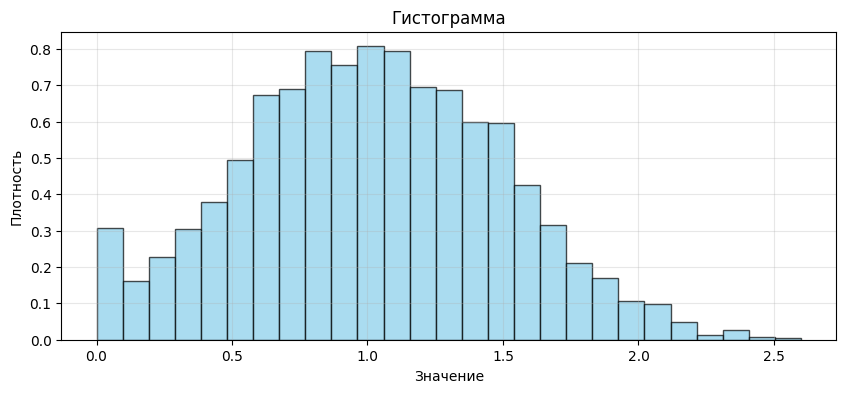

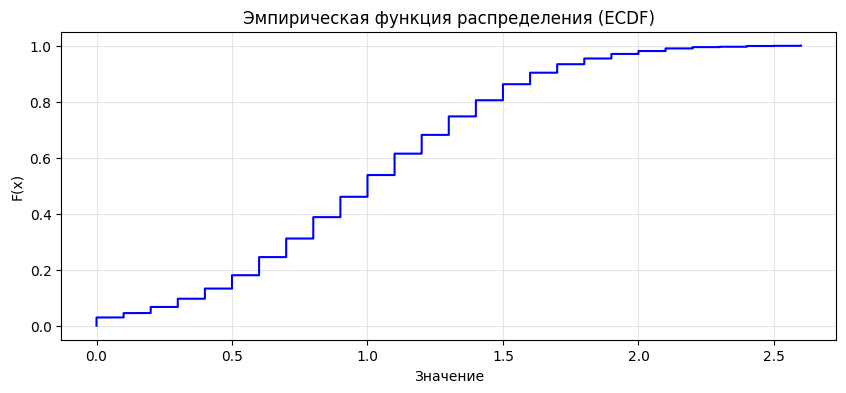

In [6]:
# Гистограмма
plt.figure(figsize=(10,4))
plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Гистограмма")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(alpha=0.3)
plt.show()

# Эмпирическая функция распределения (ECDF)
sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(10,4))
plt.step(sorted_data, y, where="post", color="blue")
plt.title("Эмпирическая функция распределения (ECDF)")
plt.xlabel("Значение")
plt.ylabel("F(x)")
plt.grid(alpha=0.3)
plt.show()

## II.

Хи-квадрат статистика: 200.8066569445311
Критическое значение χ² (95%): 16.918977604620444
Гипотеза нормальноси отклоняется
Асимметрия: 0.09837930491958932
Эксцесс: -0.35033868704647286


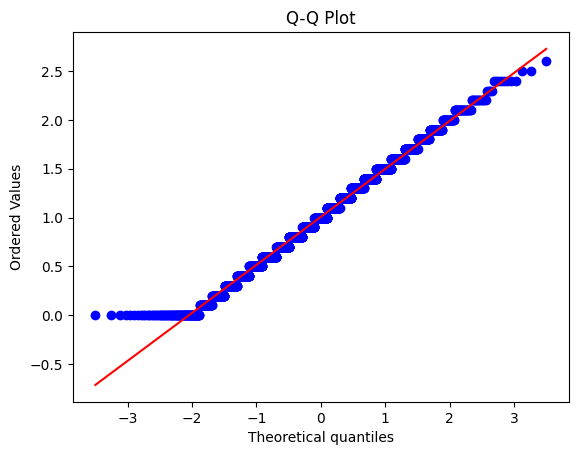

In [7]:
mu, sigma = np.mean(data), np.std(data, ddof=1)

# --- Хи-квадрат тест ---
# Разобьем на k интервалов
n = len(data)
k = 1 + int(np.log2(n))

# Границы интервалов
bins = np.linspace(min(data), max(data), k+1)

# Наблюдаемые частоты
observed, _ = np.histogram(data, bins)

# Ожидаемые частоты (по нормальному распределению)
cdf = stats.norm.cdf(bins, loc=mu, scale=sigma)
expected = n * np.diff(cdf)

# χ² статистика
chi2_stat = np.sum((observed - expected) ** 2 / expected)

# Степени свободы: k - p - 1 (где p=2 — оценили μ и σ)
df_chi2 = k - 3
chi2_crit = stats.chi2.ppf(0.95, df_chi2)

print("Хи-квадрат статистика:", chi2_stat)
print("Критическое значение χ² (95%):", chi2_crit)
if chi2_stat < chi2_crit:
    print("Гипотеза нормальности принимается")
else:
    print("Гипотеза нормальноси отклоняется")

skew = stats.skew(data)
excess = stats.kurtosis(data)

print("Асимметрия:", skew)
print("Эксцесс:", excess)

# ====================================================
# Q-Q plot
# ====================================================
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## III.


Исходные:
  χ² = 3512.5460735800793  крит = 68.66929391228578  → Не норма
  Асимметрия = 0.09837930491958932
  Эксцесс = -0.35033868704647286


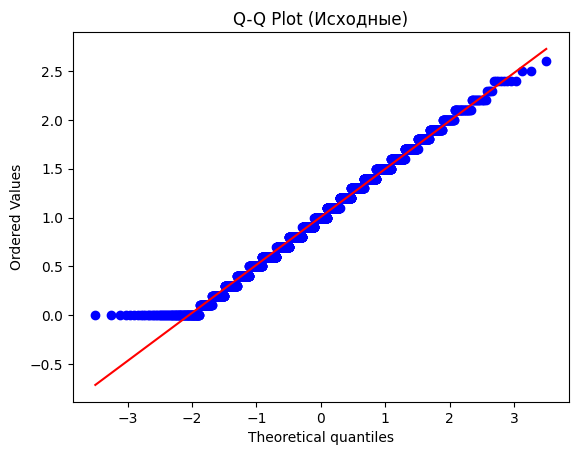


Усечённые:
  χ² = 3898.7521664173114  крит = 68.66929391228578  → Не норма
  Асимметрия = 0.09433839709298053
  Эксцесс = -0.36391263465357904


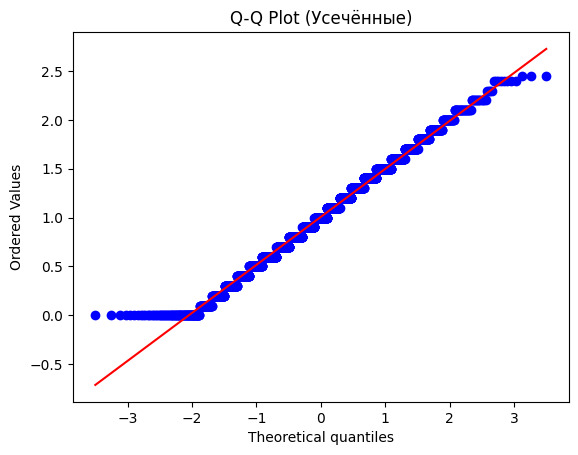


Стандартизованные:
  χ² = 3512.546073580072  крит = 68.66929391228578  → Не норма
  Асимметрия = 0.09837930491959027
  Эксцесс = -0.35033868704647464


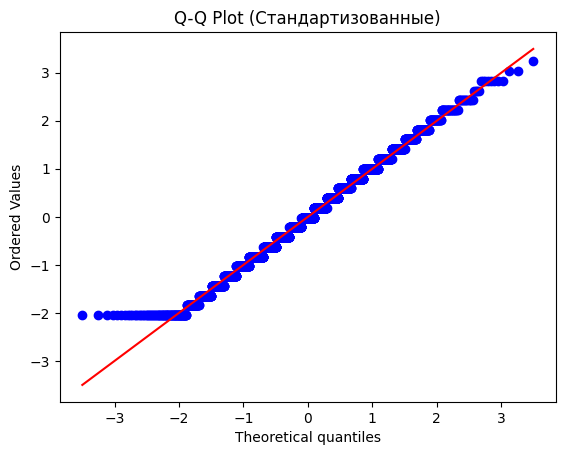


Лог-преобразование:
  χ² = 4995.003275426881  крит = 68.66929391228578  → Не норма
  Асимметрия = -0.5328151096480248
  Эксцесс = -0.03805762626270326


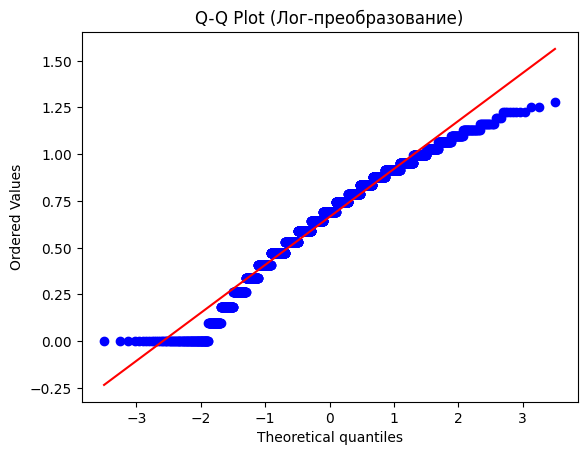


BoxCox:
  χ² = 3656.027896788117  крит = 68.66929391228578  → Не норма
  Асимметрия = -0.028872753538600738
  Эксцесс = -0.3730085006444068


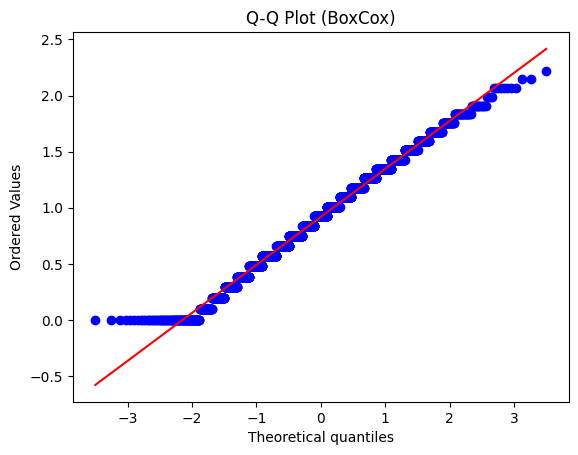

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# --- Функция χ² теста ---
def chi2_test(data, bins="sqrt"):
    n = len(data)
    if bins == "sqrt":
        k = int(np.sqrt(n))
    else:
        k = bins
    
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    bins = np.linspace(min(data), max(data), k+1)
    
    observed, _ = np.histogram(data, bins)
    cdf = stats.norm.cdf(bins, loc=mu, scale=sigma)
    expected = n * np.diff(cdf)
    
    chi2_stat = np.sum((observed - expected) ** 2 / expected)
    df_chi2 = k - 3
    chi2_crit = stats.chi2.ppf(0.95, df_chi2)
    
    return chi2_stat, chi2_crit, (chi2_stat < chi2_crit)

# --- Загружаем данные ---
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")
col = 'Screen_Time_Before_Bed'
data = df[col].dropna().values

# --- 1. Усечение выбросов (IQR) ---
Q1, Q3 = np.percentile(data, [25, 75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
data_iqr = np.clip(data, lower, upper)

# --- 2. Стандартизация ---
data_std = (data - np.mean(data)) / np.std(data)

# --- 3. Логарифмирование / Yeo-Johnson ---
if np.all(data_iqr >= 0):
    data_log = np.log1p(data)
else:
    data_log, _ = stats.yeojohnson(data)

# --- 4. BoxCox ---
if np.min(data) <= 0:
        data_positive = data - np.min(data) + 1
else:
    data_positive = data
data_bc, lambda_val = stats.boxcox(data_positive)

# --- Проверка нормальности ---
datasets = {
    "Исходные": data,
    "Усечённые": data_iqr,
    "Стандартизованные": data_std,
    "Лог-преобразование": data_log,
    "BoxCox": data_bc
}

for name, d in datasets.items():
    chi2_stat, chi2_crit, ok = chi2_test(d)
    skew, kurt = stats.skew(d), stats.kurtosis(d)
    print(f"\n{name}:")
    print("  χ² =", chi2_stat, " крит =", chi2_crit, " →", "Норма" if ok else "Не норма")
    print("  Асимметрия =", skew)
    print("  Эксцесс =", kurt)

    # Q-Q plot
    stats.probplot(d, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot ({name})")
    plt.show()

In [9]:
data_new = data_bc

In [10]:
_, p_value = stats.normaltest(data_new)
alpha = 0.05
p_value < alpha

np.True_

In [11]:
mean = np.mean(data_new)
var = np.var(data_new)
mode = stats.mode(data_new)[0]
median = np.median(data_new)
quantiles = np.quantile(data_new, [0.25, 0.5, 0.75])
kutorsis = stats.kurtosis(data_new)
skewness = stats.skew(data_new)
iqr = stats.iqr(data_new)

print("Среднее:", mean)
print("Дисперсия:", variance)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили:\n", quantiles)
print("Эксцесс:", excess_kurtosis)
print("Асимметрия:", skewness)
print("Интерквартильный размах:", iqr)

Среднее: 0.9185965774641262
Дисперсия: 0.24292897187951537
Мода: 0.9239077914012731
Медиана: 0.9239077914012731
Квантили:
 [0.65971462 0.92390779 1.26377564]
Эксцесс: -0.35033868704647286
Асимметрия: -0.028872753538600738
Интерквартильный размах: 0.6040610212641243


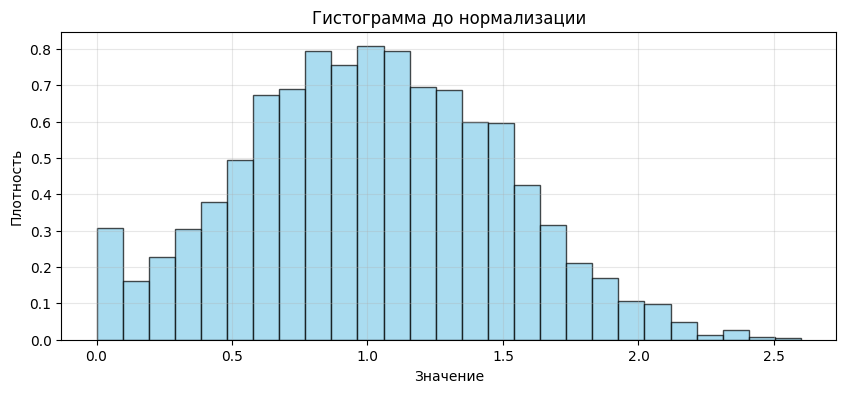

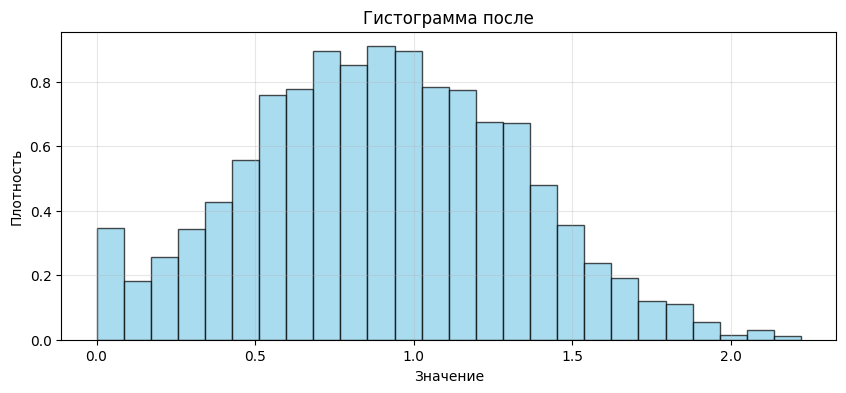

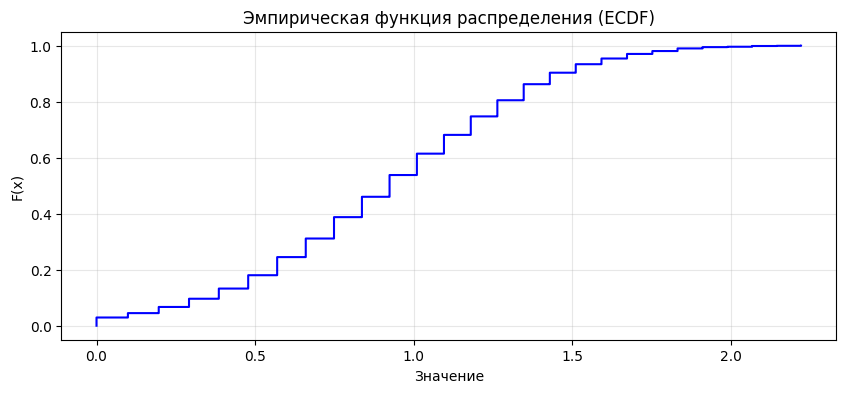

In [12]:
plt.figure(figsize=(10,4))
plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Гистограмма до нормализации")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(alpha=0.3)
plt.show()
# Гистограмма
plt.figure(figsize=(10,4))
plt.hist(data_new, bins=26, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Гистограмма после")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(alpha=0.3)
plt.show()

# Эмпирическая функция распределения (ECDF)
sorted_data = np.sort(data_new)
y = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(10,4))
plt.step(sorted_data, y, where="post", color="blue")
plt.title("Эмпирическая функция распределения (ECDF)")
plt.xlabel("Значение")
plt.ylabel("F(x)")
plt.grid(alpha=0.3)
plt.show()

## IV.

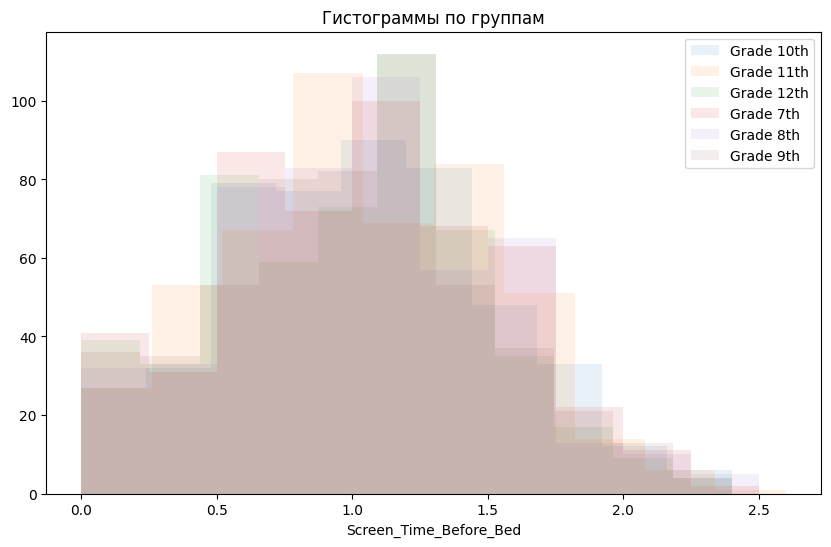

In [13]:
groups = df.groupby('School_Grade')
plt.figure(figsize=(10,6))

for grade, group in groups:
    plt.hist(group[col], bins='sturges', alpha=0.1, label=f'Grade {grade}')

plt.xlabel(col)
plt.title('Гистограммы по группам')
plt.legend()
plt.show()

In [14]:
stats_by_group = groups[col].agg(['mean', 'var'])
stats_by_group

,mean,var
School_Grade,,
10th,1.020945,0.240960
11th,1.022547,0.233507
12th,0.982420,0.243762
7th,1.006640,0.254694
8th,1.005187,0.241366
9th,1.005133,0.244107
